# 探索性分析

## 导入模块

In [86]:
from load_data import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks", color_codes=True)

## 加载数据

In [59]:
ijcai_18_train, ijcai_18_test = load_data()

### 数据基本信息

本数据集共有27个原始特征字段（含id和label），共496509条记录。其中包括：

- 训练集：478,138条记录
- 测试集：18,371条记录

(训练集包含分类标签：is_trade)

在分析时，将合并训练集和测试集，方便数据处理

In [60]:
ijcai_18_test['is_trade'] = -1 # test label 标注为-1，用以区分训练集和数据集
ijcai_18_merged = pd.concat([ijcai_18_train, ijcai_18_test], axis=0)
ijcai_18_merged.head()

,instance_id,item_id,item_category_list,item_property_list,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,...,context_page_id,predict_category_property,shop_id,shop_review_num_level,shop_review_positive_rate,shop_star_level,shop_score_service,shop_score_delivery,shop_score_description,is_trade
0,108641074714126964,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4006,5799347067982556520:-1;509660095530134768:-1;5...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0
1,5754713551599725161,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4001,5799347067982556520:9172976955054793469;790838...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0
2,842679481291040981,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4001,5799347067982556520:5131280576272319091;725801...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0
3,937088850059189027,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4016,509660095530134768:-1;5799347067982556520:-1;7...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0
4,7975697065017708072,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4001,5799347067982556520:9172976955054793469;790838...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0


In [61]:
ijcai_18_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 496509 entries, 0 to 18370
Data columns (total 27 columns):
instance_id                  496509 non-null int64
item_id                      496509 non-null int64
item_category_list           496509 non-null object
item_property_list           496509 non-null object
item_brand_id                496509 non-null int64
item_city_id                 496509 non-null int64
item_price_level             496509 non-null int64
item_sales_level             496509 non-null int64
item_collected_level         496509 non-null int64
item_pv_level                496509 non-null int64
user_id                      496509 non-null int64
user_gender_id               496509 non-null int64
user_age_level               496509 non-null int64
user_occupation_id           496509 non-null int64
user_star_level              496509 non-null int64
context_id                   496509 non-null int64
context_timestamp            496509 non-null int64
context_page_id      

可以看出，其中有部分数据格式存在问题，需要手工修改

In [63]:
remodified_rows = (
    ('instance_id', np.object),
    ('item_id', np.object),
    ('item_brand_id', np.object),
    ('item_city_id', np.object),
    ('user_id', np.object),
    ('user_gender_id', np.object),
    ('user_occupation_id', np.object),
    ('context_id', np.object),
    ('context_page_id', np.object),
    ('shop_id', np.object),
    ('is_trade', np.object),
)
for row, retype in remodified_rows:
    ijcai_18_merged[row] = ijcai_18_merged[row].astype(retype)

In [64]:
ijcai_18_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 496509 entries, 0 to 18370
Data columns (total 27 columns):
instance_id                  496509 non-null object
item_id                      496509 non-null object
item_category_list           496509 non-null object
item_property_list           496509 non-null object
item_brand_id                496509 non-null object
item_city_id                 496509 non-null object
item_price_level             496509 non-null int64
item_sales_level             496509 non-null int64
item_collected_level         496509 non-null int64
item_pv_level                496509 non-null int64
user_id                      496509 non-null object
user_gender_id               496509 non-null object
user_age_level               496509 non-null int64
user_occupation_id           496509 non-null object
user_star_level              496509 non-null int64
context_id                   496509 non-null object
context_timestamp            496509 non-null int64
context_page_

In [65]:
ijcai_18_test = ijcai_18_merged[ijcai_18_merged.is_trade == -1]
ijcai_18_train = ijcai_18_merged[ijcai_18_merged.is_trade != -1]

### 查看数据分布

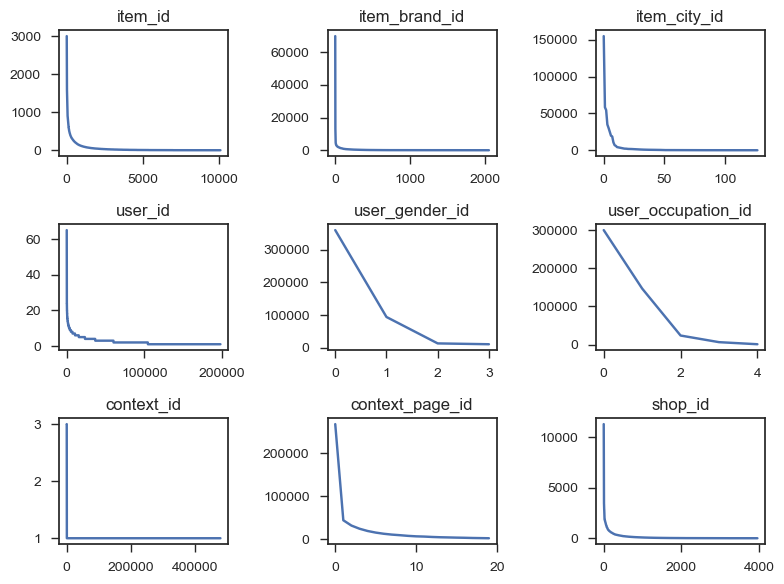

In [114]:
rows = (
    'item_id',
    'item_brand_id',
    'item_city_id',
    'user_id',
    'user_gender_id',
    'user_occupation_id',
    'context_id',
    'context_page_id',
    'shop_id'
)
plt.figure(figsize=(8,6),dpi=100)
for idx in range(len(rows)):
    plt.subplot(3, 3, idx + 1)
    plt.plot(ijcai_18_train[rows[idx]].value_counts().values)
    plt.title(rows[idx])
plt.tight_layout()